In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
from scipy import stats


Numpy polynomial fit
slope:  2.23
intercept:  153.45

Sklearn linear model
r-sq 0.07504010648619386
slope: [2.22806716]
intercept: 153.44714073876165

Linear regression
intercept:  153.45
r-value:  0.27
p-value:  0.01118
slope:  2.23
standard error:  0.86


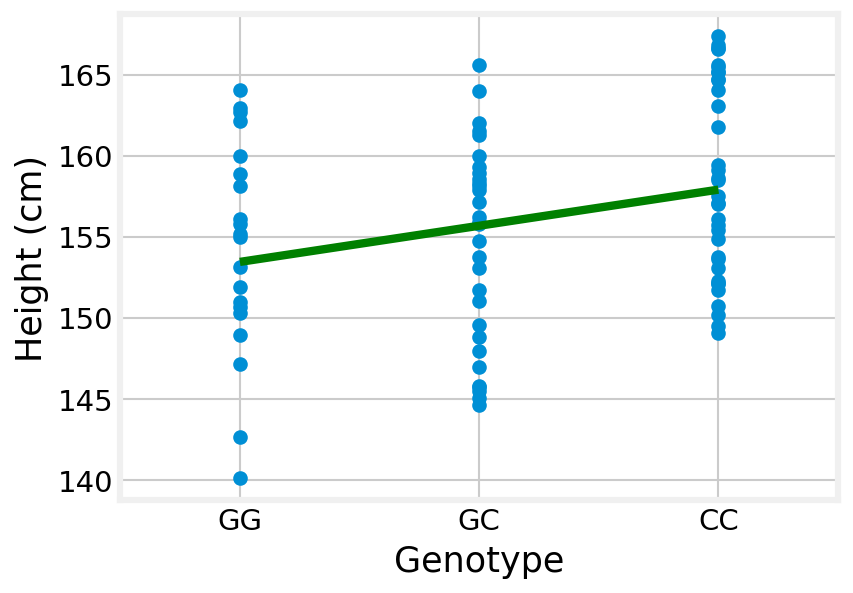

In [7]:
geno_nums = [20,30,35]
lows = [140,143,149]
highs = [165,166,168]
phenos = []
for i,num in enumerate(geno_nums):
    phenos.extend(np.random.uniform(low=lows[i], high=highs[i], size=num))
phenos=np.array(phenos)
genos = np.hstack([np.zeros(geno_nums[0]),np.ones(geno_nums[1]),np.ones(geno_nums[2])*2])

x = genos
y = phenos

# Fit with polyfit
print('\nNumpy polynomial fit')
b, m = polyfit(x, y, 1)
print('slope: ','{:1.2f}'.format(m))
print('intercept: ','{:1.2f}'.format(b))
plt.style.use('fivethirtyeight')
f,a = plt.subplots(1,1,figsize=(5.5,4),dpi=150,facecolor='w')
a.plot(x, y, 'o')
a.plot(x, b + m * x, 'g-')
plt.xticks([0,1,2],['GG','GC','CC'])
plt.xlabel('Genotype')
plt.ylabel('Height (cm)')
a.set_facecolor('w')

# sklearn linear model
print('\nSklearn linear model')
model = LinearRegression()
genos_l = np.array(genos).reshape((-1, 1))
model.fit(genos_l, phenos)
print('r-sq', model.score(genos_l, phenos))
print('slope:', model.coef_)
print('intercept:', model.intercept_)

# stats linear regression
print('\nLinear regression')
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print('intercept: ','{:1.2f}'.format(intercept))
print('r-value: ', '{:1.2f}'.format(r_value))

print('p-value: ', '{:1.5f}'.format(p_value))
print('slope: ', '{:1.2f}'.format(slope))
print('standard error: ', '{:1.2f}'.format(std_err))

plt.xlim([-0.5,2.5])
plt.show()